---
# Name of Method - Model 4
---
In this notebook, ...


## Results

---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from features import features

### Read data file

In [2]:
churn_df = pd.read_excel('../data/churn_cleaned_featEng.xlsx')
churn_df

,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_Yes,Online Backup_Yes,Device Protection_Yes,Tech Support_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,33.964131,118.272783,2,53.85,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
1,34.059281,118.307420,2,70.70,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
2,34.048013,118.293953,8,99.65,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
3,34.062125,118.315709,28,104.80,1,0,1,1,1,0,0,0,1,1,0,0,1,0,1,0
4,34.039224,118.266293,49,103.70,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,34.341737,116.539416,72,21.15,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
7039,34.667815,117.536183,24,84.80,0,0,1,1,0,0,1,0,1,1,1,0,1,0,0,1
7040,34.559882,115.637164,72,103.20,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0
7041,34.167800,116.864330,11,29.60,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0


---

<center>
    
## Preparing data

</center>

---

### Separate X and y features

In [3]:
# Seperate X and y features
X = churn_df.drop(columns=['Churn Value'])
y = churn_df['Churn Value']

### Split dataset (training/testing)

In [4]:
# Separating the dataset into a training dataset (80%) and testing+validation (20%) dataset
X_train, X_test_validation, y_train, y_test_validation = train_test_split(X, y, train_size=0.8, random_state=5)

# Separating the testing+valisation dataset into a testing dataset (10%) and a validation dataset (10%) 
X_val, X_test, y_val, y_test = train_test_split(X_test_validation, y_test_validation, test_size=0.5, random_state=5)

### Converting data subset to dataframe 

In [5]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### Scale X features

In [6]:
# Create instance of scaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

<center>
    
## Decision Tree Model

</center>

---

### Find best parameters for model
---

**Create intance of model**

In [7]:
dtc = DecisionTreeClassifier(random_state=25) #'balanced'

**Setting parameters for the GridSearch**

In [8]:
param_grid = { 'criterion' : ['gini', 'entropy', 'log_loss'],
               'splitter' : ['best','random'],
               'max_depth' : [3,4,5,6,7,8,10],
               'class_weight': ['balanced', {0: 1, 1: 1}, {0: 0.7, 1: 1.3}, {0: 0.5, 1: 1.5}, {0: 0.3, 1: 1.7}, {0: 0.1, 1: 1.9}],
             }

**Setting instance of GridSearchCV**

In [9]:
grid = GridSearchCV(dtc, param_grid, scoring='f1')

**Train the models to find best parameters**

In [10]:
np.unique(y)

array([0, 1])

In [11]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'class_weight': ['balanced', {0: 1, 1: 1},
                                          {0: 0.7, 1: 1.3}, {0: 0.5, 1: 1.5},
                                          {0: 0.3, 1: 1.7}, {0: 0.1, 1: 1.9}],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 8, 10, 15, 20, 40],
                         'splitter': ['best', 'random']},
             scoring='f1')

---
### Investigate best model's predictive features

---

In [12]:
grid.best_params_

{'class_weight': {0: 0.7, 1: 1.3},
 'criterion': 'entropy',
 'max_depth': 5,
 'splitter': 'best'}

In [13]:
grid.best_score_

np.float64(0.6334383234452934)

In [14]:
grid.n_features_in_

19

In [15]:
model = grid.best_estimator_

**Plot Decision Tree Arborescence**

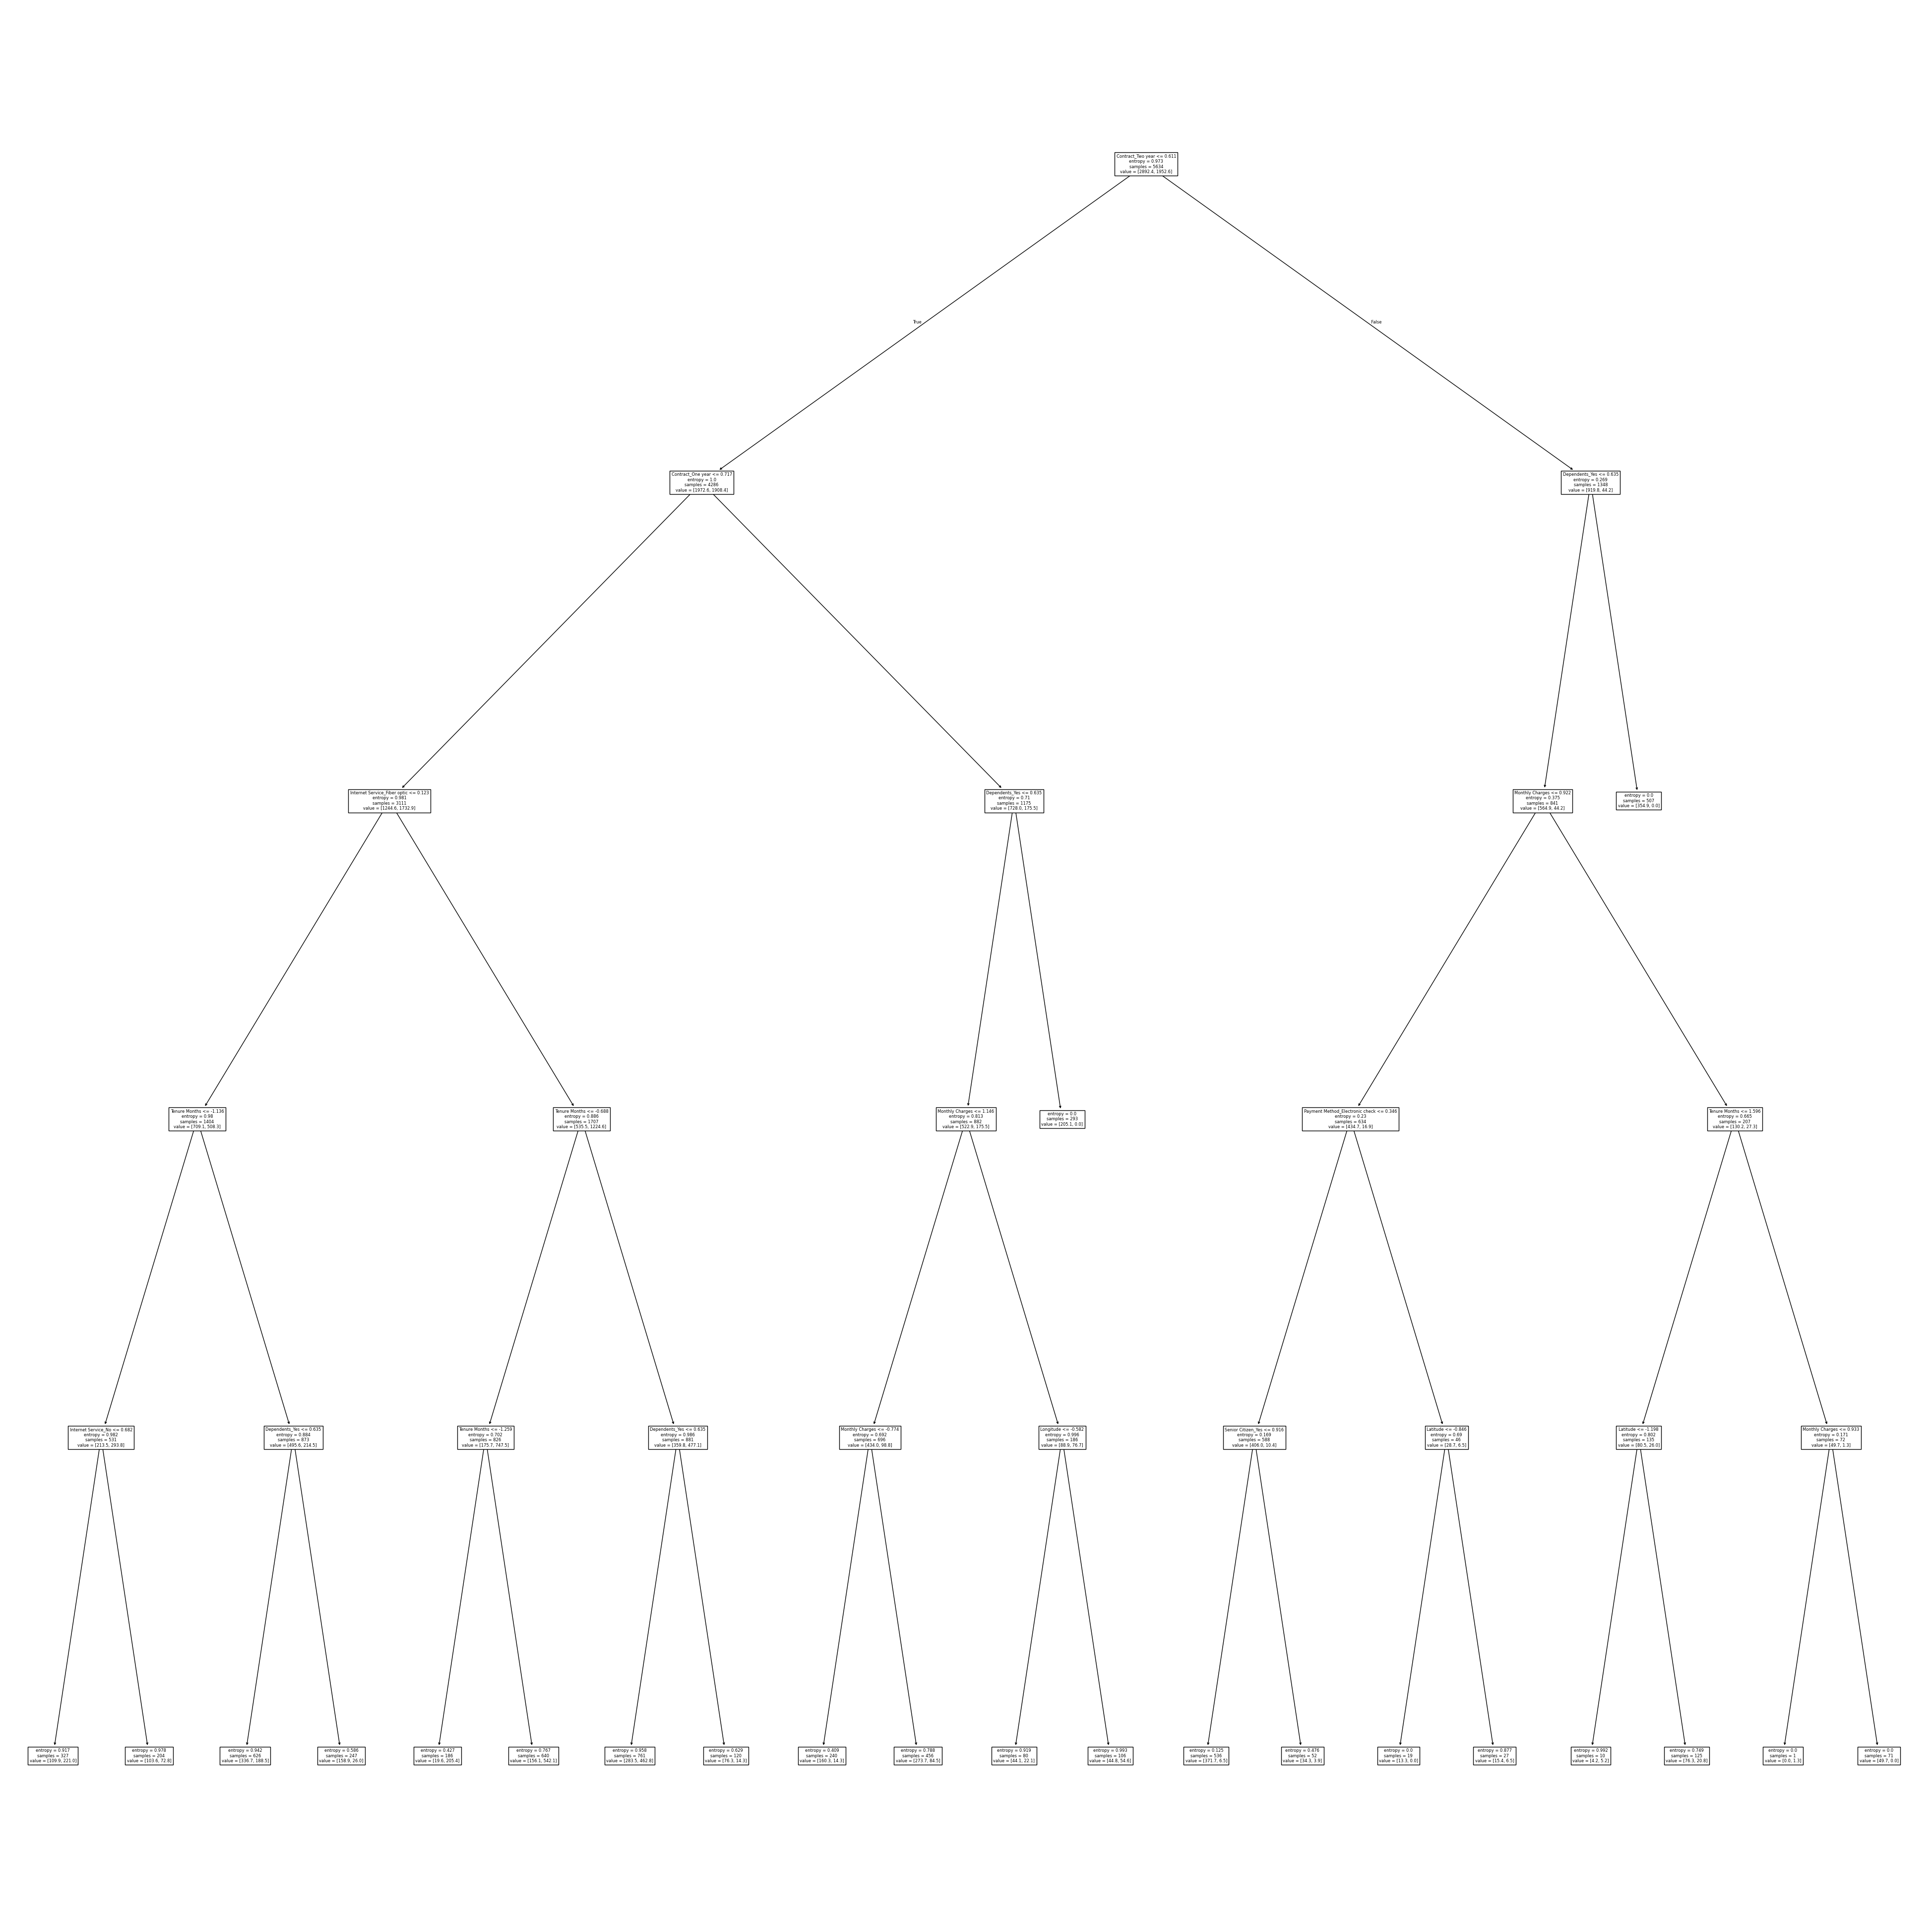

In [16]:
# Create figure and adjust size
plt.figure(figsize=(50,50))

# Plot decision tree
plot_tree(model, feature_names=X_train.columns)

# Save decision tree
plt.savefig('../graph/DecisionTreeClassifier.png')

# Show model
plt.show()

---
### Get scores for the training dataset
---

**Make prediction on training dataset**

In [17]:
y_pred_train = grid.predict(X_train_scaled)

**Create Confusion Matrix**

In [18]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[3249,  883],
       [ 354, 1148]])

**Plot confusion matrix**

<Figure size 400x400 with 0 Axes>

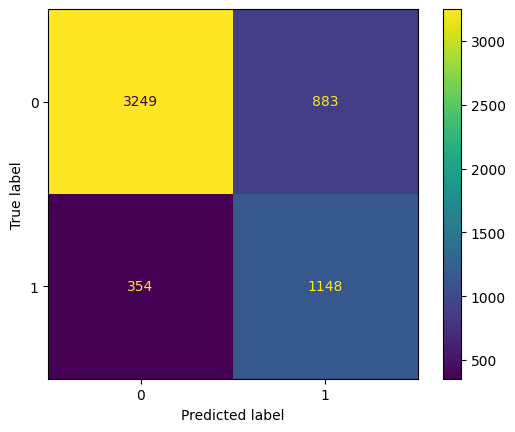

In [19]:
# Create figure and adjsut its size
plt.figure(figsize=(4,4))

# Create plot for Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid.classes_)

disp.plot()

# Show plot
plt.show()

**Print classification Report**

In [20]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      4132
           1       0.57      0.76      0.65      1502

    accuracy                           0.78      5634
   macro avg       0.73      0.78      0.74      5634
weighted avg       0.81      0.78      0.79      5634



---

<center>
    
## Validation

</center>

---

**Run model on testing dataset**

In [21]:
y_pred_test = grid.predict(X_test_scaled)

**Create Confusion Matrix**

In [22]:
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[376, 128],
       [ 44, 157]])

**Plot confusion matrix**

<Figure size 400x400 with 0 Axes>

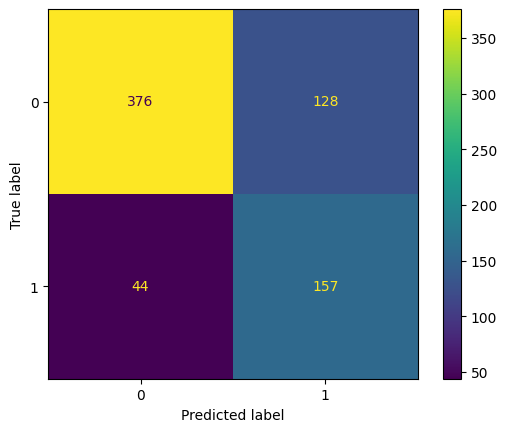

In [23]:
# Create figure and adjsut its size
plt.figure(figsize=(4,4))

# Create plot for Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid.classes_)

disp.plot()

# Show plot
plt.show()

**Print classification Report**

In [24]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.75      0.81       504
           1       0.55      0.78      0.65       201

    accuracy                           0.76       705
   macro avg       0.72      0.76      0.73       705
weighted avg       0.80      0.76      0.77       705



---

<center>
    
## Results

</center>

---

### Results